In [63]:
%matplotlib inline

import os
import sys
src_dir = os.path.join(os.getcwd(), '..', 'src')
sys.path.append(src_dir)

from utils import GLOBAL, functions

In [64]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option('chained_assignment', None)

In [65]:
#Import yearly stats
stats_df = pd.read_csv(GLOBAL.STATS_2020)

#Override FantasyPoints Column with your League scoring
stats_df['FantasyPoints'] = functions.scoringCalculator(
    stats_df['Rec'], stats_df['ReceivingYds'], stats_df['ReceivingTD'], stats_df['FumblesLost'], stats_df['RushingYds'], stats_df['RushingTD'], stats_df['PassingYds'], stats_df['PassingTD'], stats_df['Int'], GLOBAL.PPR_SCORING
)

In [66]:
#Set Pts/G
stats_df['Pts/G'] = round((stats_df['FantasyPoints'] / stats_df['G']), 2)

#Set Usage/G (Tgts + RushingAtt)
stats_df['Usage/G'] = round((stats_df['Tgt'] + stats_df['RushingAtt']) / stats_df['G'], 2)

In [67]:
#Set up separate DFs by Pos
rb_stats_df = stats_df[stats_df['Pos'] == 'RB']
wr_stats_df = stats_df[stats_df['Pos'] == 'WR']
te_stats_df = stats_df[stats_df['Pos'] == 'TE']
qb_stats_df = stats_df[stats_df['Pos'] == 'QB']

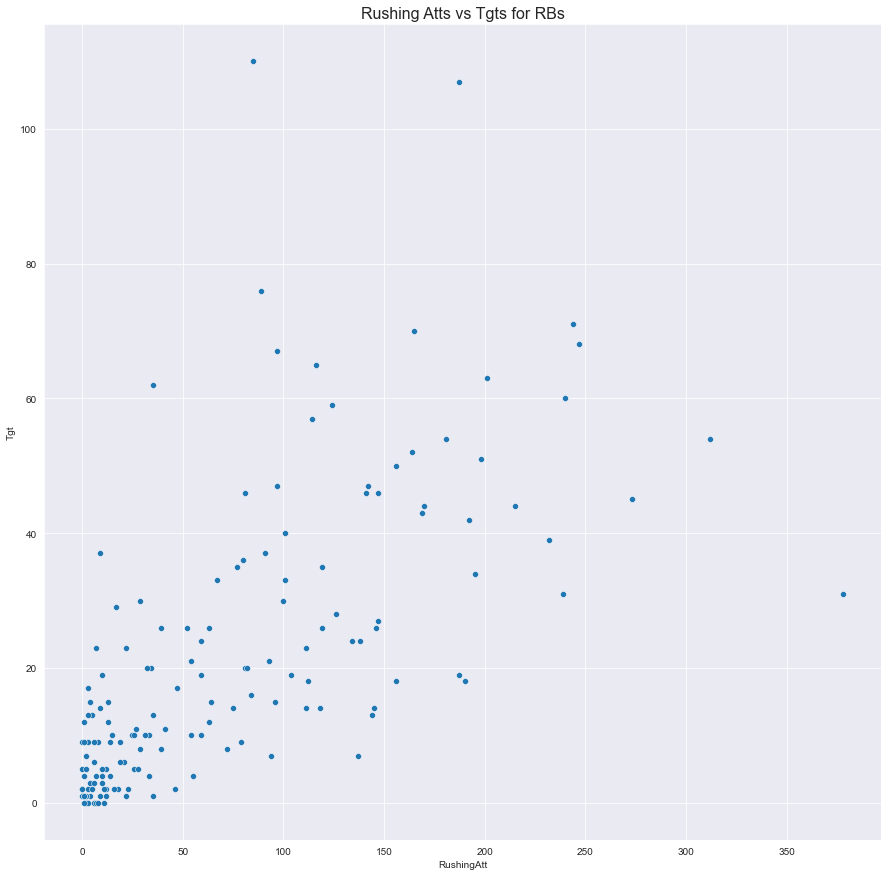

In [68]:
#Rushing Attempts vs Targets for RBs
sns.set_style('darkgrid')

plt.figure(figsize=(15, 15))
plt.title('Rushing Atts vs Tgts for RBs', fontsize=16)

sns.scatterplot(x=rb_stats_df['RushingAtt'], y=rb_stats_df['Tgt']);

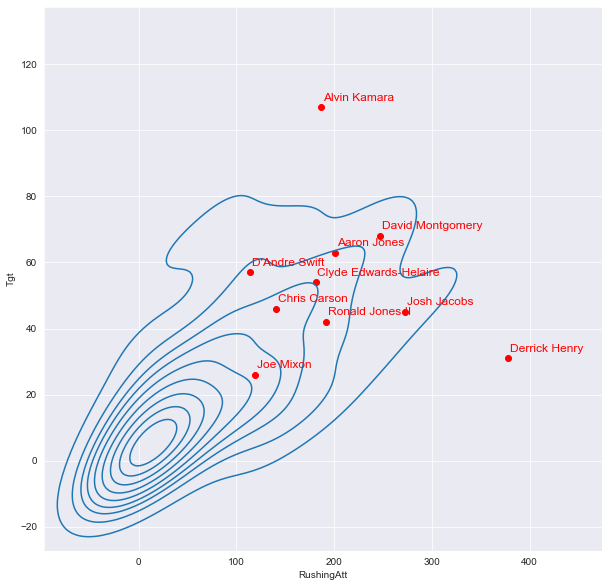

In [94]:
fig, ax = plt.subplots(figsize=(10, 10))

notable_players = ['Derrick Henry', 'Alvin Kamara', 'Johnathan Taylor', 'Miles Sander', 'Aaron Jones', 'Josh Jacobs', 'Chris Carson', 'Joe Mixon', 'Ronald Jones II', 'D\'Andre Swift', 'David Montgomery', 'Clyde Edwards-Helaire']

for player_name in notable_players:
    player = rb_stats_df[rb_stats_df['Player'] == player_name]

    if not player.empty:
        targets = player['Tgt']
        rushes = player['RushingAtt']

        ax.annotate(player_name, xy=(rushes+2, targets+2), color='red', fontsize=12)
        ax.scatter(rushes, targets, color='red')

sns.kdeplot(x=rb_stats_df['RushingAtt'], y=rb_stats_df['Tgt']);

<Figure size 1080x1080 with 0 Axes>

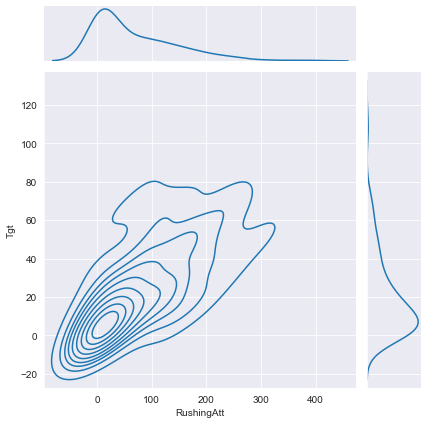

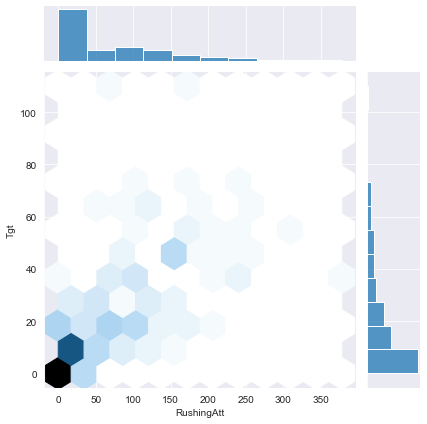

In [95]:
plt.figure(figsize=(15, 15))

sns.jointplot(x=rb_stats_df['RushingAtt'], y=rb_stats_df['Tgt'], kind='kde');

sns.jointplot(x=rb_stats_df['RushingAtt'], y=rb_stats_df['Tgt'], kind='hex');

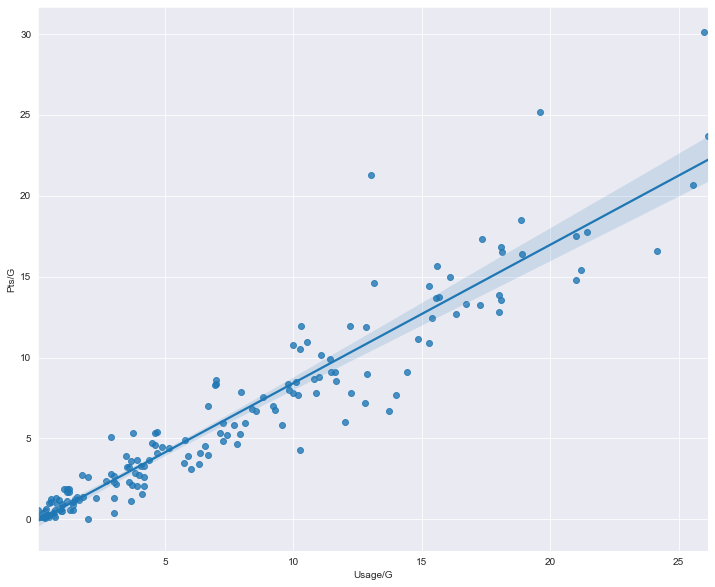

In [71]:
#RB Usage/G vs Pts/G Regression Plot
plt.figure(figsize=(12, 10))

sns.regplot(x=rb_stats_df['Usage/G'], y=rb_stats_df['Pts/G']);

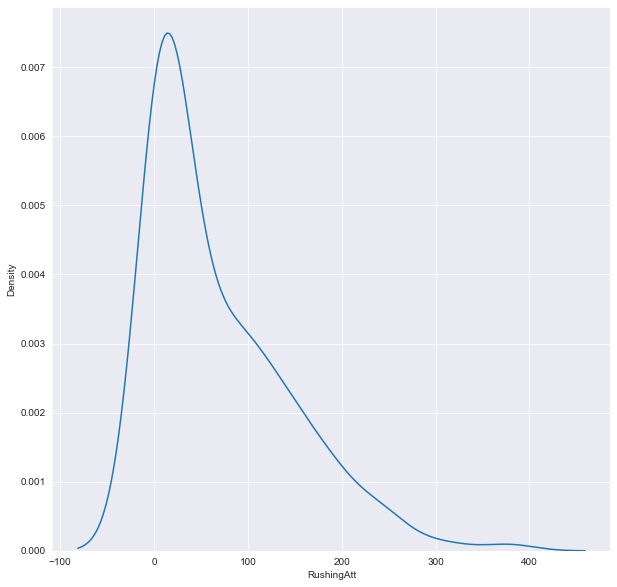

In [73]:
#Dist of RB carries
plt.figure(figsize=(10, 10))
sns.kdeplot(rb_stats_df['RushingAtt']);

<Figure size 720x720 with 0 Axes>

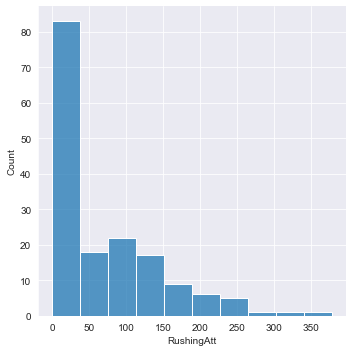

In [75]:
plt.figure(figsize=(10, 10))
sns.distplot(rb_stats_df['RushingAtt']);

<Figure size 720x720 with 0 Axes>

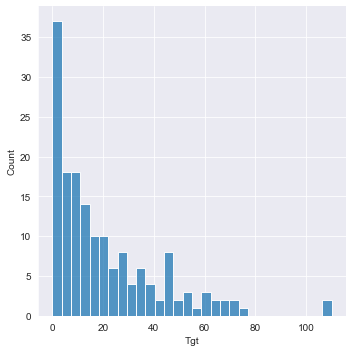

In [79]:
plt.figure(figsize=(10, 10))
sns.displot(rb_stats_df['Tgt'], bins=30);

<Figure size 720x720 with 0 Axes>

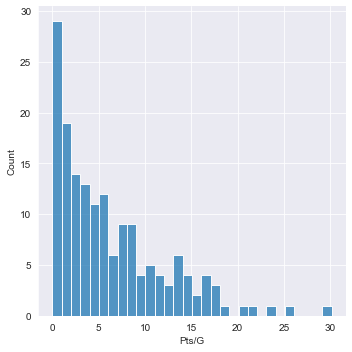

In [81]:
#FFPts/G for RBs
plt.figure(figsize=(10, 10))
sns.displot(rb_stats_df['Pts/G'], bins=30);

In [82]:
rb_stats_df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,...,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost,Pts/G,Usage/G
0,Derrick Henry,TEN,RB,26.0,16,16,31,19,0,0,...,17,378,114,0,331.1,0,3,2,20.69,25.56
1,Alvin Kamara,NOR,RB,25.0,15,10,107,83,0,0,...,16,187,756,5,377.8,0,1,0,25.19,19.60
2,Dalvin Cook,MIN,RB,25.0,14,14,54,44,0,0,...,16,312,361,1,331.8,0,5,3,23.70,26.14
11,Jonathan Taylor,IND,RB,21.0,15,13,39,36,0,0,...,11,232,299,1,252.8,0,1,1,16.85,18.07
12,Aaron Jones,GNB,RB,26.0,14,14,63,47,0,0,...,9,201,355,2,258.9,0,2,0,18.49,18.86
